# **Principles of Data Analytics - Tasks**

### Authored by: Stephen Kerr

#### **Assessment Links:**

- The Tasks Descriptions are outlined in the following link: [Assessment Description][def1]
- The Marking Scheme is outlined in the following link: [Assesment Marking Scheme][def2] 


[def1]: https://github.com/ianmcloughlin/principles_of_data_analytics/blob/main/assessment/tasks.md
[def2]: https://github.com/ianmcloughlin/principles_of_data_analytics/blob/main/assessment/instructions.md

## **Task 1: Source the Data Set**


### **Task 1 Description:**

Import the Iris data set from the sklearn.datasets module.  
Explain, in your own words, what the load_iris() function returns.

### **Task 1 Submission:**

The **load_iris()** function loads the Iris dataset which is classic multi-class classification dataset.  
The dataset is imported as a *'Bunch'* which is a dictionary like-object with the following attributes:  
- **'data'** which is the data matrix.
- **'target'** which is the classification target.
- **'feature_name'** which is a list of the dataset columns.
- **'target_names'** which is a list of the target classes.
- **'data'** attribute being a pandas Dataframe.
- **'target'** attribute is a pandas Series.
- **'DESCR'** which is a string that is a full desciption of the dataset.
- **'filename'** which is a sting showing the path to the location of the data.

The iris data was loaded with the parameter ***'as_frame'*** set as *True* resulting in:


There is also an *additional attribute* when the load_iris() is loaded with the ***'as_frame'*** = *True*, called **'frame'** which is a pandas DataFrame with the combination of data and target. 

---

## References: 

1. [![load_iris](https://tse4.mm.bing.net/th?id=OIP.Hf2oXZgEGL98vH30SEeZQQAAAA&pid=Api&P=0&h=180) Click the image to learn more about load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)
2. [Markdown Syntax Cheatsheet](https://www.markdown-cheatsheet.com/ "Here the title goes")

In [1]:
# import sklearn
import sklearn as skl
import numpy as np

# Load the iris data set as 'data_bunch'.
# Note, used the parameter 'as_frame' = True to get the data in a pandas DataFrame.
iris = skl.datasets.load_iris(as_frame=True)

# printed the 'iris' data bunch attributes / keys
print(f'The following are the Attributes of the Iris Data \'Bunch\':' )
for key in iris.keys():
    if key == 'frame':
        print(f'\t{key} - This is the main source of the data.') 
    else: 
        print(f'\t{key}')

# Print out the Target Names
print(iris['target_names'])

# In the Iris Data Bunch the 'frame' DataFrame is the key store of data, 
# To compleete the DataFrame we need to add in a 'species' column,
# In order to the assign each row to the appropraite species class ['setosa' 'versicolor' 'virginica'],
# We use the map() method the 'target' column of the 'frame' DataFrame and the 'target_names' list,
iris['frame']['species'] = iris['frame']['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Asigning the 'iris_dataframe' as 'iris['frame'] 
iris_dataframe = iris['frame']

The following are the Attributes of the Iris Data 'Bunch':
	data
	target
	frame - This is the main source of the data.
	target_names
	DESCR
	feature_names
	filename
	data_module
['setosa' 'versicolor' 'virginica']


## **Task 2: Explore the Data Structure**

### **Task 2 Description:** 

Print and explain the shape of the data set, the first and last 5 rows of the data, the feature names, and the target classes.

### **Task 2 Submission:**



The target classes where assigned to the ***'iris_dataframe'*** in the last section.

In [3]:
# Shape of iris dataset - Note we added the 'species' column 
print(f'The shape of the Iris Dataset (\'iris_dataframe\') is: '
      f'\n \tRows (instances) = {iris_dataframe.shape[0]},'
      f'\n \tColumns (features) = {iris_dataframe.shape[1]},\n')

The shape of the Iris Dataset ('iris_dataframe') is: 
 	Rows (instances) = 150,
 	Columns (features) = 6,



In [ ]:
# The first 5 rows of the Iris Data Set using the .head() and .style Pandas method: 
# Reference https://www.delftstack.com/howto/python-pandas/pandas-display-dataframe-in-a-table-style/
iris_dataframe.head().style

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.100000,3.500000,1.400000,0.200000,0,setosa
1,4.900000,3.000000,1.400000,0.200000,0,setosa
2,4.700000,3.200000,1.300000,0.200000,0,setosa
3,4.600000,3.100000,1.500000,0.200000,0,setosa
4,5.000000,3.600000,1.400000,0.200000,0,setosa


In [5]:
# The last 5 rows of the Iris Data Set using the .tail() and .style Pandas method:
iris_dataframe.tail().style

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
145,6.700000,3.000000,5.200000,2.300000,2,virginica
146,6.300000,2.500000,5.000000,1.900000,2,virginica
147,6.500000,3.000000,5.200000,2.000000,2,virginica
148,6.200000,3.400000,5.400000,2.300000,2,virginica
149,5.900000,3.000000,5.100000,1.800000,2,virginica


In [6]:
# The feature names are:
print('The follwing is all the feature names and target classes for the Iris Dataset:')
for i, key in enumerate(iris_dataframe.keys(), start=1):
    if key == 'target' or key == 'species':
        print(f'\t {i}. {key} is a target class.')
    else: 
        print(f'\t {i}. {key} is a feature name.')


# Note previously we added in a new column that assigns each row to the appropriate target class. 
# Could replace the 'target' column with the 'species' to cutdown on data

The follwing is all the feature names and target classes for the Iris Dataset:
	 1. sepal length (cm) is a feature name.
	 2. sepal width (cm) is a feature name.
	 3. petal length (cm) is a feature name.
	 4. petal width (cm) is a feature name.
	 5. target is a target class.
	 6. species is a target class.


In [38]:
# Subsetting the 'iris_dataframe' by the 'species' 
# Reference https://app.datacamp.com/

# creating the 'setosa_DataFrame'
setosa_Dataframe = iris_dataframe[iris_dataframe['species'] == 'setosa']
# displaying the total number of 'setosa' in the dataset
print(f'The number of setosa in the datset = {setosa_Dataframe.shape[0]}'
      f'\nWhich is a percentage of {((setosa_Dataframe.shape[0]/iris_dataframe.shape[0])*100):.2f}%\n')

# creating the 'versicolor_DataFrame'
versicolor_Dataframe = iris_dataframe[iris_dataframe['species'] == 'versicolor']
# displaying the total number of 'setosa' in the dataset
print(f'The number of versicolor in the datset = {versicolor_Dataframe.shape[0]}'
      f'\nWhich is a percentage of {((versicolor_Dataframe.shape[0]/iris_dataframe.shape[0])*100):.2f}%\n')

# creating the 'virginica_DataFrame'
virginica_Dataframe = iris_dataframe[iris_dataframe['species'] == 'virginica']
# displaying the total number of 'setosa' in the dataset
print(f'The number of virginica in the datset = {virginica_Dataframe.shape[0]}'
      f'\nWhich is a percentage of {((virginica_Dataframe.shape[0]/iris_dataframe.shape[0])*100):.2f}%\n')



The number of setosa in the datset = 50
Which is a percentage of 33.33%

The number of versicolor in the datset = 50
Which is a percentage of 33.33%

The number of virginica in the datset = 50
Which is a percentage of 33.33%



## **Task 3: Summarize the Data**

### **Task Description:** 

For each feature in the dataset, calculate and display:

- mean
- minimum
- maximum
- standard deviation
- median

### **Task 3 Submission:**

In the code below you can see that the mean, minimum, maximum, standard deviation, median for the Feature Names of the Iris dataset, and in the species subset.

In [ ]:
# use the describe() method to get the descriptive statistics of the features in the iris dataset
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
# Reference: https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/

# creating a function to print the descriptive statistics of a given feature
def statistic_print(feature, statistics):
    print(f'The following are the descriptive statistics for the feature: {feature}')
    for stat_name, stat_value in statistics.items():
        if stat_name == '50%': # changing the '50%' to 'median'
            stat_name = 'median'
        elif stat_name == 'count': # skipping the 'count' statistic as requested
            continue
        elif stat_name == '25%': # skipping the '25%' statistic as requested
            continue
        elif stat_name == '75%': # skipping the '75%' statistic as requested
            continue
        print(f'{stat_name}: {stat_value}') # printing out each statistic
    print('\n')

# looping though the features 1. Creating, 2. Printing the descriptive statistics 
for feature in iris_dataframe.keys():
    statistics = iris_dataframe[feature].describe()
    statistic_print(feature, statistics)


The following are the descriptive statistics for the feature: sepal length (cm)
mean: 5.843333333333334
std: 0.828066127977863
min: 4.3
median: 5.8
max: 7.9


The following are the descriptive statistics for the feature: sepal width (cm)
mean: 3.0573333333333337
std: 0.4358662849366982
min: 2.0
median: 3.0
max: 4.4


The following are the descriptive statistics for the feature: petal length (cm)
mean: 3.7580000000000005
std: 1.7652982332594662
min: 1.0
median: 4.35
max: 6.9


The following are the descriptive statistics for the feature: petal width (cm)
mean: 1.1993333333333336
std: 0.7622376689603465
min: 0.1
median: 1.3
max: 2.5


The following are the descriptive statistics for the feature: target
mean: 1.0
std: 0.8192319205190405
min: 0.0
median: 1.0
max: 2.0


The following are the descriptive statistics for the feature: species
unique: 3
top: setosa
freq: 50




## Task 4: Visualize Features

### ***Task Description:*** 

Plot histograms for each feature using matplotlib.  
Add appropriate titles and axis labels.

### ***Task 4 Submission:***

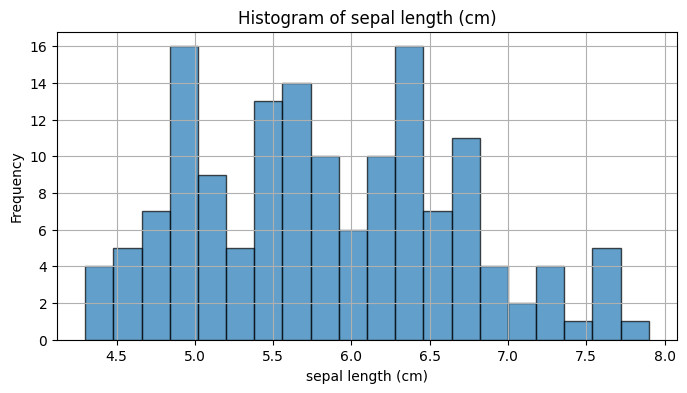

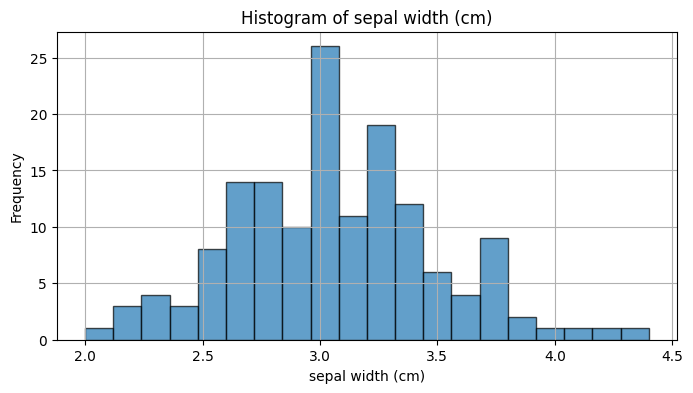

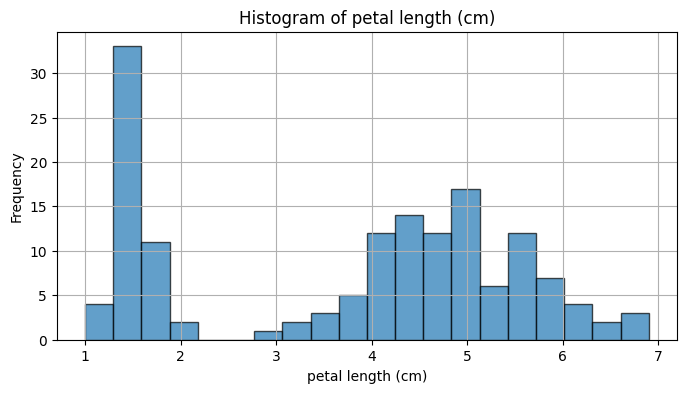

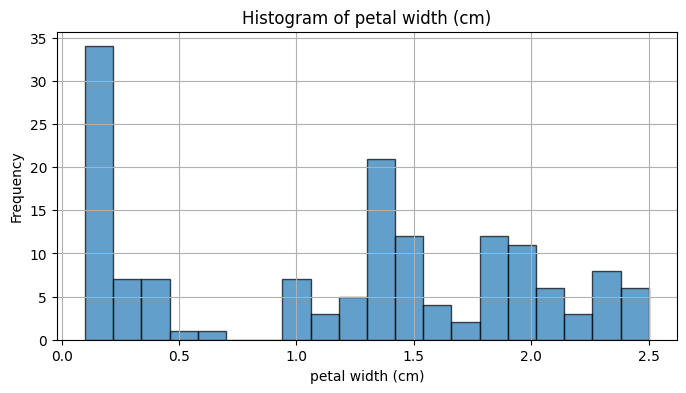

In [39]:
import matplotlib.pyplot as plt

# Plot histograms for each feature
features = iris_dataframe.columns[:-2]  # Exclude 'target' and 'species' columns

for feature in features:
    plt.figure(figsize=(8, 4))
    plt.hist(iris_dataframe[feature], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Task 5: Investigate Relationships

### Task Description: 

XYZ

## Task 6: Analyze  Relationships

### Task Description: 

XYZ

## Task 7: Analyze  Class Distributions

### Task Description: 

XYZ

## Task 8: Compute Correlations

### Task Description: 

XYZ

## Task 9: Fit a Simple Linear Regression

### Task Description: 

XYZ

## Task 10: Too Many Features 

### Task Description: 

XYZ

# End